In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Nov  3 01:33:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/YOLOv5_Practice

/content/drive/MyDrive/YOLOv5_Practice


In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
%cd yolov5
!pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-11-3 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)



  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model

In [6]:
img = '/content/drive/MyDrive/YOLOv5_Practice/images_and_videos/images/Dog_and_Me.jpg'

In [7]:
results = model(img)
results.print()

image 1/1: 1080x1080 5 persons
Speed: 435.8ms pre-process, 184.2ms inference, 73.2ms NMS per image at shape (1, 3, 640, 640)


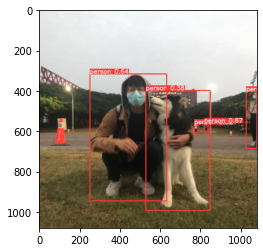

In [8]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [9]:
results.render()

[array([[[232, 232, 232],
         [232, 232, 232],
         [232, 232, 232],
         ...,
         [250, 250, 248],
         [250, 250, 248],
         [250, 250, 248]],
 
        [[232, 232, 232],
         [232, 232, 232],
         [232, 232, 232],
         ...,
         [250, 250, 248],
         [250, 250, 248],
         [250, 250, 248]],
 
        [[232, 232, 232],
         [232, 232, 232],
         [232, 232, 232],
         ...,
         [249, 249, 247],
         [250, 250, 248],
         [250, 250, 248]],
 
        ...,
 
        [[103,  87,  53],
         [104,  88,  54],
         [100,  84,  50],
         ...,
         [ 92,  75,  45],
         [ 91,  74,  44],
         [ 82,  65,  35]],
 
        [[109,  93,  59],
         [106,  90,  56],
         [ 99,  83,  49],
         ...,
         [ 90,  73,  43],
         [ 94,  77,  47],
         [ 90,  73,  43]],
 
        [[114,  98,  64],
         [109,  93,  59],
         [100,  84,  50],
         ...,
         [ 89,  72,  42],
  

# Real Time Detections 

In [ ]:
# colab is not available to steam 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train from scratch

In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)


In [ ]:
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade

In [ ]:
%cd labelImg

In [ ]:
!pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
%cd ..
%cd yolov5

In [ ]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:
# Load Custom Model

In [10]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/YOLOv5_Practice/yolov5/runs/train/exp7/weights/best.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-11-3 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



Fusing layers... 
Model Summary: 213 layers, 7058671 parameters, 0 gradients
Adding AutoShape... 


In [11]:
img_awake = "/content/drive/MyDrive/YOLOv5_Practice/data/images/awake.7f6b1803-3c34-11ec-b24f-94e6f7a1c25e.jpg"
img_drowsy = "/content/drive/MyDrive/YOLOv5_Practice/data/images/drowsy.92ad39fd-3c34-11ec-a5a3-94e6f7a1c25e.jpg"


In [12]:
results_awake = model(img_awake)
results_drowsy = model(img_drowsy)

In [13]:
results_awake.print()
results_drowsy.print()

image 1/1: 480x640 1 www
Speed: 628.3ms pre-process, 36.3ms inference, 5.7ms NMS per image at shape (1, 3, 480, 640)
image 1/1: 480x640 1 drowsy
Speed: 162.6ms pre-process, 33.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)


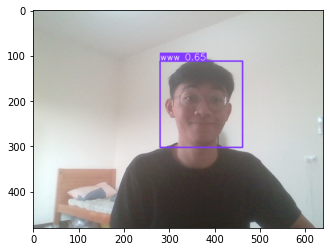

In [14]:
%matplotlib inline 
plt.imshow(np.squeeze(results_awake.render()))
plt.show()

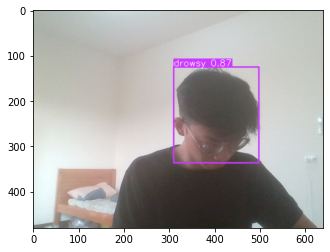

In [15]:
%matplotlib inline 
plt.imshow(np.squeeze(results_drowsy.render()))
plt.show()